# Notebook 2: Monte Carlo Methods

Welcome to the second notebook of the workshop! In this notebook, you will use Monte Carlo (MC) algorithms in the game of blackjack. Before we dive into the problem, let's first take a quick look at the Monte Carlo Methods.



In reinforcement learning, we aim to maximise the expected cumulative reward. Maximization of expected cumulative reward is usually formulated as maximizing the expected discounted return, where the return at time $t$, $G_t$, is defined as

$$
{G_t} \buildrel\textstyle.\over= {R_{t + 1}} + \gamma {R_{t + 2}} + {\gamma ^2}{R_{t + 3}} +  \ldots  = \sum\limits_{k = 0}^\infty  {{\gamma ^k}{R_{t + k + 1}}}
$$
where $\gamma$ is called the *discount rate*, $0 \le \gamma  \le 1$. Looking at this formulation, it is possible to see that returns at successive time steps are related to each other:

$$
{G_t} \buildrel\textstyle.\over= {R_{t + 1}} + \gamma {G_{t + 1}}
$$

A *policy*, denoted as $\pi$, determines how the agent selects its actions in states. More formally, it is a mapping from states to probabilities over actions

$$
\pi \left( {\left. a \right|s} \right) = \mathbb{P}\left( {\left. {{A_t} = a} \right|{S_t} = s} \right)
$$

This equation gives the probability for the agent to take action ${A_t} = a$ in a state ${S_t} = s$ at time $t$ for $a \in \mathcal{A}$ and $s \in \mathcal{S}$. For each $s$, ${\pi \left( {\left. a \right|s} \right)}$ defines a probability distribution over $a \in \mathcal{A}$, which means $\sum\limits_a {\pi \left( {\left. a \right|s} \right)}  = 1$. In other words, a policy fully defines the behavior of an agent in its environment.

In order to determine how good it is to be in a state, the concept of value functions is used. The *state-value function* under a policy $\pi$ is denoted as ${v_\pi }$, and defined as the expected return when starting in $s$ and following $\pi$ thereafter:

$$
{v_\pi }\left( s \right) \buildrel\textstyle.\over= {E_\pi }\left[ {\left. {{G_t}} \right|{S_t} = s} \right],
$$

for all $s \in \mathcal{S}$, where $t$ is any time step, and ${\mathbb{E}_\pi }\left[  \cdot  \right]$ is the expected value of a random variable given that the agent follows policy $\pi$. If there is any terminal state, its value is always zero. Note that the state-value function is sometimes referred to as simply the value function.

The *action-value function* under a policy $\pi$ is denoted as ${q_\pi }$, and defined as the expected return when starting in a state $s$ and taking an action $a$ in that state and thereafter following policy $\pi$:

$$
 {q_\pi }\left( {s,a} \right) \buildrel\textstyle.\over= {\mathbb{E}_\pi }\left[ {\left. {{G_t}} \right|{S_t} = s,{A_t} = a} \right]
$$

Monte Carlo prediction uses empirical mean return instead of expected return to learn the value function for a policy. The idea is that the mean return should converge to the expected return as more returns are observed. In MC prediction, we run many episodes, then calculate the average returns for every state we encountered. For example, in the figure below, suppose that we are estimating the value of state $S_t$. The black squares indicate the terminal states for each episode, and the return values next to them are calculated starting from state $S_t$. The MC methods simply take the mean of all the returns from these 7 episodes to estimate the value of state $S_t$.

<img src="images/average_return_MC.png" width="720" height="360" align="left" />

We need to take one aspect into consideration when implementing an averaging-of-returns algorithm. Since an episode may contain multiple visits to the same state, we need to decide whether we calculate the returns following each of those visits independently and then take the mean of all of them, or we only use the first visit to each state. The former is called the *every-visit MC*, and the latter is the *first-visit MC*. Both are valid approaches with similar theoretical properties. 

Pseudocode for the every-visit MC prediction for estimating the action-value function for a policy is given below.

<img src="images/every_visit_MC_predictionQ.png" width="600" height="400" align="left" />

Note that we estimate $Q(s,a)$ using the incremental formula that was also used in the first notebook:
$$
Q\left( {{S_t}, {A_t}} \right) \leftarrow Q\left( {{S_t}, {A_t}} \right) + \frac{1}{{N\left( {{S_t}, {A_t}} \right)}}\left[ {{G_t} - Q\left( {{S_t}, {A_t}} \right)} \right]
$$
where ${N\left( {{S_t}, {A_t}} \right)}$ indicates the number of times state-action tuple $\left( {{S_t}, {A_t}} \right)$ is visited. The counter in this equation is sometimes replaced by a constant step-size parameter $\alpha$, usually called the *learning rate*, resulting in
$$
Q\left( {{S_t}, {A_t}} \right) \leftarrow Q\left( {{S_t}, {A_t}} \right) + \alpha \left[ {{G_t} - Q\left( {{S_t}, {A_t}} \right)} \right]
$$

$G_t$ is called the *MC target*, and $\left[ {{G_t} - Q\left( {{S_t}, {A_t}} \right)} \right]$ is the *MC error*. After each episode, we update the current value $Q\left( {{S_t}, {A_t}} \right)$ toward the target, the actual return $G_t$, by a fraction of the MC error. The target is expected to indicate a desirable direction to move toward, though it may be noisy. The MC error measures the distance between the current estimate $Q\left( {{S_t}, {A_t}} \right)$ and the better estimate $G_t$. The step-size parameter controls the amount of the update.

<img src="images/blackjack.png" width="400" height="300" align="left" />

In this notebook, you will use the MC methods in the game of blackjack.
Blackjack is a card game where the goal is to obtain cards that sum to as
near as possible to 21 without going over.  The player is playing against a fixed
dealer.

Face cards (Jack, Queen, King) have point value 10.
Aces can either count as 11 or 1, and it's called 'usable' at 11.
This game is placed with an infinite deck (or with replacement).
The game starts with dealer having one face up and one face down card, while
player having two face up cards. (Virtually for all Blackjack games today).

The player can request additional cards (hit=1) until they decide to stop
(stick=0) or exceed 21 (bust).

After the player sticks, the dealer reveals their facedown card, and draws
until their sum is 17 or greater.  If the dealer goes bust the player wins.
If neither player nor dealer busts, the outcome (win, lose, draw) is
decided by whose sum is closer to 21.  The reward for winning is +1,
drawing is 0, and losing is -1. All rewards within a game are zero, and we do not discount ($\gamma$ = 1);
therefore these terminal rewards are also the returns.

The observation of a 3-tuple of: the players current sum,
the dealer's one showing card (1-10 where 1 is ace),
and whether or not the player holds a usable ace (0 or 1).
This environment corresponds to the version of the blackjack problem
described in Example 5.1 in [1].

Reinforcement learning algorithms usually have two tasks; *prediction* and *control*. Prediction is computing the state-value function ${v_\pi }$ or the action-value function ${q_\pi }$ for an arbitrary policy $\pi$. It is also referred to as policy evaluation in the dynamic programming literature. Control, on the other hand, is approximating optimal policies. In this notebook, you will use MC first for prediction and then for control.

### Section 1: Import the necessary libraries, and explore blackjack environment
You begin by importing the necessary libraries.

In [1]:
import sys
import gym
import numpy as np
from collections import defaultdict
from plot_utils import plot_blackjack_values, plot_policy

Use the code cell below to create an instance of the [Blackjack](https://github.com/openai/gym/blob/master/gym/envs/toy_text/blackjack.py) environment.

In [2]:
env = gym.make('Blackjack-v0')

Each state is a 3-tuple of:
- the player's current sum $\in \{0, 1, \ldots, 31\}$,
- the dealer's face up card $\in \{0, 1, \ldots, 10\}$, and
- whether or not the player has a usable ace (`no` $=0$, `yes` $=1$).

The agent has two potential actions:

```
    STICK = 0
    HIT = 1
```
Verify this by running the code cell below.

In [3]:
print(env.observation_space)
print(env.action_space)

Tuple(Discrete(32), Discrete(11), Discrete(2))
Discrete(2)


Execute the code cell below to play Blackjack with a random policy.  

(_The code currently plays Blackjack three times - feel free to change this number, or to run the cell multiple times.  The cell is designed for you to get some experience with the output that is returned as the agent interacts with the environment._)

In [4]:
for i_episode in range(3):
    state = env.reset()
    while True:
        print(state)
        action = env.action_space.sample()
        state, reward, done, info = env.step(action)
        if done:
            print('End game! Reward: ', reward)
            print('You won :)\n') if reward > 0 else print('You lost :(\n')
            break

(7, 10, False)
End game! Reward:  -1.0
You lost :(

(18, 8, True)
(18, 8, False)
End game! Reward:  -1.0
You lost :(

(18, 1, True)
(20, 1, True)
End game! Reward:  -1.0
You lost :(



### Section 2: MC Prediction

In this section, you will use MC for prediction (for estimating the action-value function).  

You will begin by investigating a policy where the player _almost_ always sticks if the sum of his cards exceeds 18.  In particular, the player selects action `STICK` with 80% probability if the sum is greater than 18; and, if the sum is 18 or below, she selects action `HIT` with 80% probability.  The function `generate_episode_from_limit_stochastic` samples an episode using this policy. 

The function accepts as **input**:
- `bj_env`: This is an instance of OpenAI Gym's Blackjack environment.

It returns as **output**:
- `episode`: This is a list of (state, action, reward) tuples (of tuples) and corresponds to $(S_0, A_0, R_1, \ldots, S_{T-1}, A_{T-1}, R_{T})$, where $T$ is the final time step.  In particular, `episode[i]` returns $(S_i, A_i, R_{i+1})$, and `episode[i][0]`, `episode[i][1]`, and `episode[i][2]` return $S_i$, $A_i$, and $R_{i+1}$, respectively.

In [5]:
def generate_episode_from_limit_stochastic(bj_env):
    episode = []
    state = bj_env.reset()
    while True:
        probs = [0.8, 0.2] if state[0] > 18 else [0.2, 0.8]
        action = np.random.choice(np.arange(2), p=probs)
        next_state, reward, done, info = bj_env.step(action)
        episode.append((state, action, reward))
        state = next_state
        if done:
            break
    return episode

Execute the code cell below to play Blackjack with the policy. 

(*The code currently plays Blackjack three times - feel free to change this number, or to run the cell multiple times.  The cell is designed for you to gain some familiarity with the output of the `generate_episode_from_limit_stochastic` function.*)

In [6]:
for i in range(3):
    print(generate_episode_from_limit_stochastic(env))

[((14, 1, False), 1, -1.0)]
[((20, 10, False), 0, 0.0)]
[((13, 5, False), 1, 0.0), ((19, 5, False), 0, 1.0)]


Now, you are ready to use MC for prediction. The function below, *mc_prediction_q*, implements every-visit MC prediction. It has three arguments:
- `env`: This is an instance of an OpenAI Gym environment.
- `num_episodes`: This is the number of episodes that are generated through agent-environment interaction.
- `generate_episode`: This is a function that returns an episode of interaction.
- `gamma`: This is the discount rate.  It must be a value between 0 and 1, inclusive (default value: `1`).

The algorithm, *mc_prediction_q*, returns as output:
- `Q`: This is a dictionary (of one-dimensional arrays) where `Q[s][a]` is the estimated action value corresponding to state `s` and action `a`.

In [7]:
def mc_prediction_q(env, num_episodes, generate_episode, gamma=1.0):
    # initialize empty dictionaries of arrays
    returns_sum = defaultdict(lambda: np.zeros(env.action_space.n))
    N = defaultdict(lambda: np.zeros(env.action_space.n))
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    # loop over episodes
    for i_episode in range(1, num_episodes+1):
        # monitor progress
        if i_episode % 1000 == 0:
            print("\rEpisode {}/{}.".format(i_episode, num_episodes), end="")
            sys.stdout.flush()
        # generate an episode
        episode = generate_episode(env)
        # obtain the states, actions, and rewards
        states, actions, rewards = zip(*episode)
        # prepare for discounting
        discounts = np.array([gamma**i for i in range(len(rewards)+1)])
        # update the sum of the returns, number of visits, and action-value 
        # function estimates for each state-action pair in the episode
        for i, state in enumerate(states):
            returns_sum[state][actions[i]] += sum(rewards[i:]*discounts[:-(1+i)])
            N[state][actions[i]] += 1.0
            Q[state][actions[i]] = returns_sum[state][actions[i]] / N[state][actions[i]]
    return Q

Use the cell below to obtain the action-value function estimate $Q$.  We have also plotted the corresponding state-value function.

Episode 500000/500000.

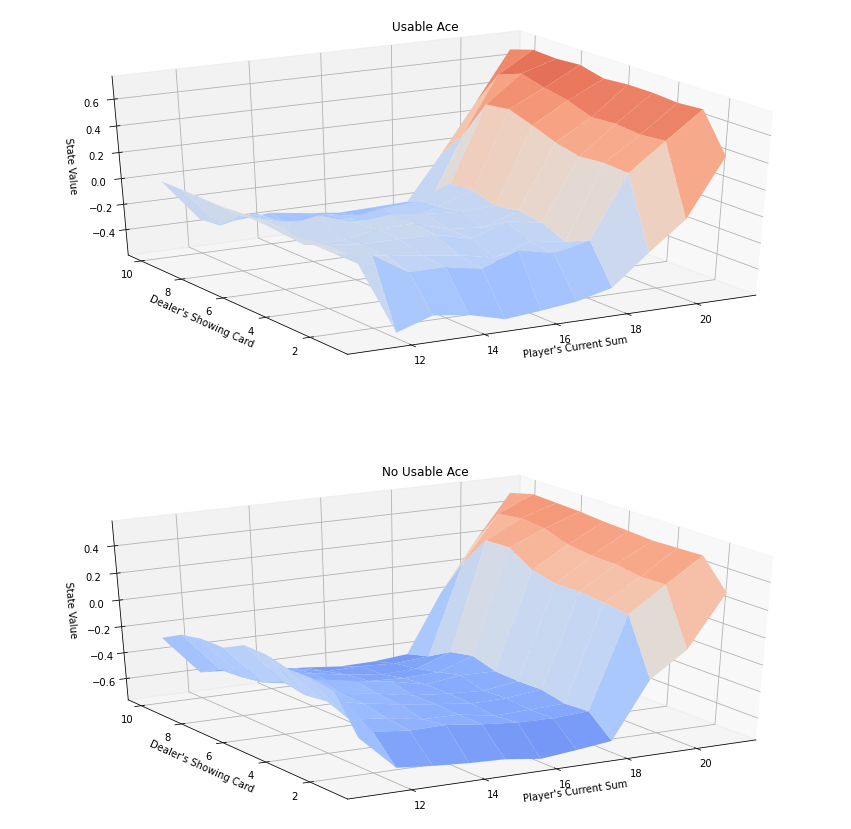

In [8]:
# obtain the action-value function
Q = mc_prediction_q(env, 500000, generate_episode_from_limit_stochastic)

# obtain the corresponding state-value function
V_to_plot = dict((k,(k[0]>18)*(np.dot([0.8, 0.2],v)) + (k[0]<=18)*(np.dot([0.2, 0.8],v))) \
         for k, v in Q.items())

# plot the state-value function
plot_blackjack_values(V_to_plot)

### Section 3: MC Control

In this section, you will use constant-$\alpha$ MC for control, that is, to approximate optimal policies. The overall idea is to proceed according to the idea of *generalized policy iteration (GPI)*. 

<img src="images/GPI.png" width="200" height="200" align="left" />

In GPI one maintains both an approximate policy and an approximate value function. The value function is repeatedly altered to more closely approximate the value function for the current policy, and the policy is repeatedly improved with respect to the current value function, as suggested by the diagram above. These two kinds of changes work against each other to some extent, as each creates a moving target for the other, but together they cause both policy and value function to approach optimality.

Pseudocode for the every-visit MC control for epsilon-greedy policies is given below.

<img src="images/every_visit_MC_control.png" width="600" height="350" align="left" />

The *mc_control* function below implements the constant-$\alpha$ MC method for control. It has seven arguments:
- `env`: This is an instance of an OpenAI Gym environment.
- `num_episodes`: This is the number of episodes that are generated through agent-environment interaction.
- `alpha`: This is the step-size parameter for the update step.
- `gamma`: This is the discount rate.  It must be a value between 0 and 1, inclusive (default value: `1`).
- `eps_start`: Epsilon value for the epsilon-greedy policy at the beginning of the training (default value: `1`, which means it starts as a random policy) .
- `eps_decay`: After each episode epsilon value is multiplied by this amount (default value: `0.99999`). 
- `eps_min`: Minimum epsilon value allowed (default value: `0.05`). 

The algorithm, *mc_control*, returns as output:
- `policy`: This is a dictionary where `policy[s]` returns the action that the agent chooses after observing state `s`.
- `Q`: This is a dictionary (of one-dimensional arrays) where `Q[s][a]` is the estimated action value corresponding to state `s` and action `a`.

In [9]:
def generate_episode_from_Q(env, Q, epsilon, nA):
    """ generates an episode from following the epsilon-greedy policy """
    episode = []
    state = env.reset()
    while True:
        action = np.random.choice(np.arange(nA), p=get_probs(Q[state], epsilon, nA)) \
                                    if state in Q else env.action_space.sample()
        next_state, reward, done, info = env.step(action)
        episode.append((state, action, reward))
        state = next_state
        if done:
            break
    return episode

def get_probs(Q_s, epsilon, nA):
    """ obtains the action probabilities corresponding to epsilon-greedy policy """
    policy_s = np.ones(nA) * epsilon / nA
    best_a = np.argmax(Q_s)
    policy_s[best_a] = 1 - epsilon + (epsilon / nA)
    return policy_s

def update_Q(env, episode, Q, alpha, gamma):
    """ updates the action-value function estimate using the most recent episode """
    states, actions, rewards = zip(*episode)
    # prepare for discounting
    discounts = np.array([gamma**i for i in range(len(rewards)+1)])
    for i, state in enumerate(states):
        old_Q = Q[state][actions[i]] 
        Q[state][actions[i]] = old_Q + alpha*(sum(rewards[i:]*discounts[:-(1+i)]) - old_Q)
    return Q

In [12]:
def mc_control(env, num_episodes, alpha, gamma=1.0, eps_start=1.0, eps_decay=.99999, eps_min=0.05):
    nA = env.action_space.n
    # initialize empty dictionary of arrays
    Q = defaultdict(lambda: np.zeros(nA))
    epsilon = eps_start
    # loop over episodes
    for i_episode in range(1, num_episodes+1):
        # monitor progress
        if i_episode % 1000 == 0:
            print("\rEpisode {}/{}.".format(i_episode, num_episodes), end="")
            sys.stdout.flush()
        # set the value of epsilon
        epsilon = max(epsilon*eps_decay, eps_min)
        # generate an episode by following epsilon-greedy policy
        episode = generate_episode_from_Q(env, Q, epsilon, nA)
        # update the action-value function estimate using the episode
        Q = update_Q(env, episode, Q, alpha, gamma)
    # determine the policy corresponding to the final action-value function estimate
    policy = dict((k,np.argmax(v)) for k, v in Q.items())
    return policy, Q

Use the cell below to obtain the estimated optimal policy and action-value function.  

In [11]:
# obtain the estimated optimal policy and action-value function
policy, Q = mc_control(env, 500000, 0.02)

Episode 500000/500000.

Next, we plot the corresponding state-value function.

In [16]:
# obtain the corresponding state-value function
V = dict((k,np.max(v)) for k, v in Q.items())

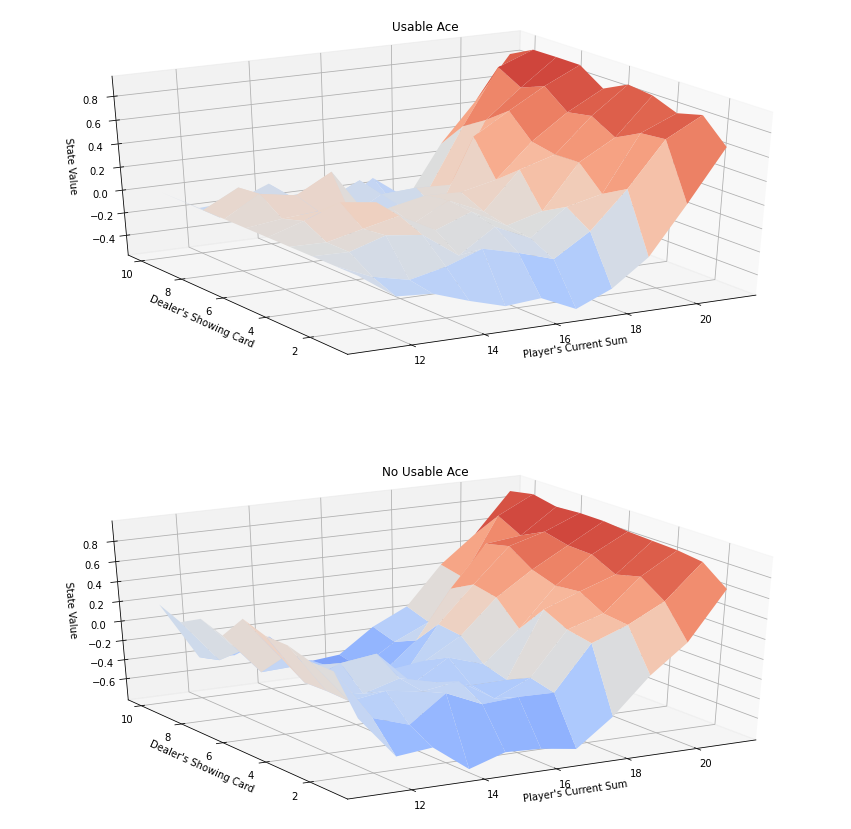

In [18]:
# plot the state-value function
plot_blackjack_values(V)

Finally, we visualize the policy that is estimated to be optimal.

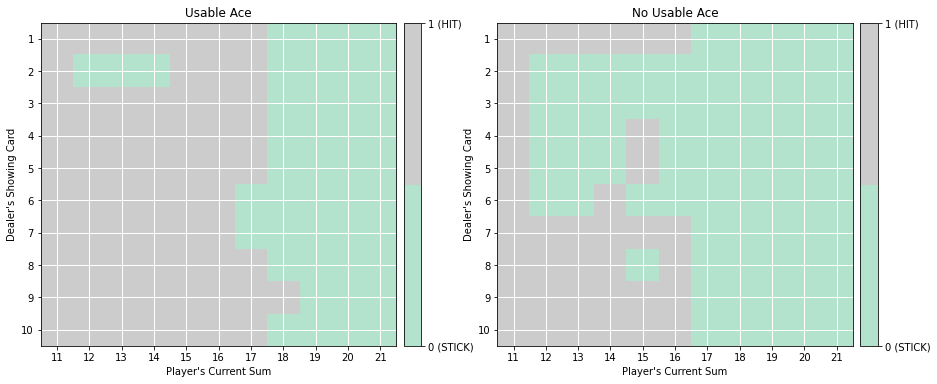

In [14]:
# plot the policy
plot_policy(policy)

The **true** optimal policy $\pi_*$ can be found in Figure 5.2 in [1] shown below.  Compare your final estimate to the optimal policy - how close are you able to get?  If you are not happy with the performance of your algorithm, take the time to tweak the decay rate of $\epsilon$, change the value of $\alpha$, and/or run the algorithm for more episodes to attain better results.


<img src="images/optimal.png" width="850" height="350" align="left" />

### Section 4: Conclusions
Congratulations, you finished the second notebook in the RL workshop! You have:
- Learned about the Monte Carlo algorithms for prediction 
- Learned about the Monte Carlo algorithms for control using the idea of generalized policy iteration (GPI) 
- Learned about the blackjack environment, and used the Monte Carlo algorithms to estimate the optimal value function and policy

In summary the Monte Carlo algorithms have the following characteristics:
- MC is model-free: It does not need to know the dynamics of the environment to estimate value functions or policies
- MC is applicable only in episodic tasks: MC must wait until the end of an episode to obtain the return
- MC has good convergence properties even with function approximation
- MC updates using actual returns, it does not bootstrap
- MC has high variance and zero bias. MC uses the return $G_t$ from the full episode to update the
  value function. As $G_t$ is an unbiased estimate of ${v_\pi }\left( {{S_t}} \right)$, MC has zero bias. However, returns from
  different episodes might vary significantly. Different transitions might take place in different episodes
  depending on the actions taken and environment dynamics, and this can result in very different returns
  from episode to episode. As a result, MS has high variance.
- MC can be sample inefficient: the high variance of the actual returns can only be mitigated with lots of episodes.  

### Section 5: Challanges
- In this notebook, we used the every-visit MC. What changes do you need to make to apply the first-visit MC methods? Would you expect the results to be very different between the two methods? Why or why not?
- In [OpenAI Gym](https://gym.openai.com/envs/#toy_text), there are multiple problems where MC can be used. Can you solve, for example, [FrozenLake8x8-v0](https://gym.openai.com/envs/FrozenLake8x8-v0) with MC?

## References
[1] R. S. Sutton and A. G. Barto, "Reinforcement Learning", MIT Press, 2018. 